# 0. 환경설정

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 연결

In [2]:
log22 = pd.read_csv(r'C:\Users\user\.ipython\채용 플랫폼 프로젝트\log_2022.csv', index_col=0)
log23 = pd.read_csv(r'C:\Users\user\.ipython\채용 플랫폼 프로젝트\log_2023.csv', index_col=0)
apply = pd.read_csv(r'C:\Users\user\.ipython\채용 플랫폼 프로젝트\Application.csv', index_col=0)

log22.tail()

,user_uuid,URL,timestamp,date,response_code,method
10054119,d2b90cda-7e0d-454f-8a64-070048551e14,setting?utm_source=notification&utm_medium=ema...,2022-07-28 00:34:34.781394 UTC,2022-07-28,200,GET
10054120,5ddc8a26-b006-4f26-b576-08095d22cf8a,jobs/id/id_title,2022-04-06 03:28:19.99548 UTC,2022-04-06,200,GET
10054121,f9387b22-2d7d-4267-8671-2279e2d784b9,@user_id,2022-11-14 12:11:53.841597 UTC,2022-11-14,200,GET
10054122,849ff1bb-6280-46f4-baaa-71d1d0796b5b,NaN,2022-02-10 05:58:29.778388 UTC,2022-02-10,200,GET
10054123,940b883f-a385-416c-94e2-b5604a78506c,api/companies/id/view,2022-02-03 02:54:20.404898 UTC,2022-02-03,200,POST


In [3]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)

# col 생략 없이 출력
pd.set_option('display.max_columns', None)

In [4]:
log23.tail()

,user_uuid,URL,timestamp,date,response_code,method
7187778,167cdb14-d145-4679-b878-66a9a2d32ee9,@user_id,2023-11-14 12:12:26.780872 UTC,2023-11-14,200,GET
7187779,167cdb14-d145-4679-b878-66a9a2d32ee9,@user_id,2023-11-14 12:11:38.859562 UTC,2023-11-14,200,GET
7187780,f5649d90-3016-4747-9924-a05d74ee895e,api/users/id/template,2023-11-14 13:16:19.471324 UTC,2023-11-14,200,POST
7187781,f5649d90-3016-4747-9924-a05d74ee895e,verify_phone?next_url=/%40kkwangpe,2023-11-14 13:16:11.530244 UTC,2023-11-14,200,GET
7187782,f5649d90-3016-4747-9924-a05d74ee895e,@user_id,2023-11-14 13:16:18.579935 UTC,2023-11-14,200,GET


In [5]:
apply.tail()

,cdate,company_uuid,job_uuid,user_uuid,application_uuid
340725,2021-05-09 16:48:46.908545,214c0ee9-4fc9-46be-ba8a-2a0368510e80,201fda38-4fbd-4541-aa27-c0a529e26c83,e5cb061e-3ca1-438a-8eb2-e50bd4f133e0,ecd4d247-8e03-4830-a4e8-c1ecb68ddf74
340726,2022-03-20 22:21:29.175182,214c0ee9-4fc9-46be-ba8a-2a0368510e80,a82d7bd3-87ee-4eaf-9519-1b60a331a474,dc1fb548-59dd-47bc-82aa-99d92e70f793,0ab0adef-da09-4381-baf7-a3fb017c19ea
340727,2022-04-07 09:41:05.036134,565e7499-1070-49c5-a3b9-a27e5ca27a9e,744ab632-8193-406a-bd51-3e2c9ddd4544,1e311075-359d-40fd-b606-f74cb1819499,bbd1050f-3729-45d9-8404-c8ad75dc5131
340728,2022-07-15 04:22:09.138346,79d4e2b6-e8df-4605-9c2c-b00e73698b61,5faf63f9-848e-4286-a07c-992c0883115d,7ba43545-bf1c-465e-8996-e55231b020c6,43107da9-ff4d-4e62-9dd2-1b2df5a9ae78
340729,2023-07-10 10:02:03.071155,1bf63e7b-f705-48ed-8958-a66508437d53,87cc225b-35b3-4105-8924-69e4fa678cda,f8ba6181-f53d-4d78-a0ea-f8a0eb84321f,6c6fc132-80a2-4322-8d71-90a376f52bd7


# 2. 전처리

### null 값 확인 및 제거

In [6]:
log22.isnull().sum()

user_uuid             0
URL              369434
timestamp             0
date                  0
response_code         0
method                0
dtype: int64

In [7]:
log23.isnull().sum()

user_uuid             0
URL              274722
timestamp             0
date                  0
response_code         0
method                0
dtype: int64

In [8]:
apply.isnull().sum()

cdate               0
company_uuid        0
job_uuid            0
user_uuid           0
application_uuid    0
dtype: int64

In [9]:
log22.dropna(inplace=True)
log23.dropna(inplace=True)

### reponse_code 확인

In [10]:
log22['response_code'].value_counts()

response_code
200    9507029
302     100209
404      34787
400      33319
409       5350
500       2241
401        886
405        732
503         99
403         36
301          2
Name: count, dtype: int64

### 2022년, 2023년 로그 병합

In [11]:
log = pd.concat([log22, log23], ignore_index=True)
log.tail()

,user_uuid,URL,timestamp,date,response_code,method
16597746,167cdb14-d145-4679-b878-66a9a2d32ee9,@user_id,2023-11-14 12:12:26.780872 UTC,2023-11-14,200,GET
16597747,167cdb14-d145-4679-b878-66a9a2d32ee9,@user_id,2023-11-14 12:11:38.859562 UTC,2023-11-14,200,GET
16597748,f5649d90-3016-4747-9924-a05d74ee895e,api/users/id/template,2023-11-14 13:16:19.471324 UTC,2023-11-14,200,POST
16597749,f5649d90-3016-4747-9924-a05d74ee895e,verify_phone?next_url=/%40kkwangpe,2023-11-14 13:16:11.530244 UTC,2023-11-14,200,GET
16597750,f5649d90-3016-4747-9924-a05d74ee895e,@user_id,2023-11-14 13:16:18.579935 UTC,2023-11-14,200,GET


In [12]:
log.isnull().sum()

user_uuid        0
URL              0
timestamp        0
date             0
response_code    0
method           0
dtype: int64

In [13]:
log[log['URL'].str.contains('signup/step3', case=False)]['URL'].value_counts()

URL
signup/step3/discover                                                                                   5773
signup/step3/import                                                                                     5217
signup/step3/done                                                                                       5206
signup/step3/import?next_url=/signup/detail                                                              115
signup/step3/discover?next_url=/signup/detail                                                             99
signup/step3/done?next_url=/signup/detail                                                                 97
signup/step3/null                                                                                          8
signup/step3/done?next_url=/companies/aptstory                                                             2
signup/step3/import?next_url=/reset_password                                                               2
signup/step3/di

In [14]:
log.tail()

,user_uuid,URL,timestamp,date,response_code,method
16597746,167cdb14-d145-4679-b878-66a9a2d32ee9,@user_id,2023-11-14 12:12:26.780872 UTC,2023-11-14,200,GET
16597747,167cdb14-d145-4679-b878-66a9a2d32ee9,@user_id,2023-11-14 12:11:38.859562 UTC,2023-11-14,200,GET
16597748,f5649d90-3016-4747-9924-a05d74ee895e,api/users/id/template,2023-11-14 13:16:19.471324 UTC,2023-11-14,200,POST
16597749,f5649d90-3016-4747-9924-a05d74ee895e,verify_phone?next_url=/%40kkwangpe,2023-11-14 13:16:11.530244 UTC,2023-11-14,200,GET
16597750,f5649d90-3016-4747-9924-a05d74ee895e,@user_id,2023-11-14 13:16:18.579935 UTC,2023-11-14,200,GET


In [15]:
apply.tail()

,cdate,company_uuid,job_uuid,user_uuid,application_uuid
340725,2021-05-09 16:48:46.908545,214c0ee9-4fc9-46be-ba8a-2a0368510e80,201fda38-4fbd-4541-aa27-c0a529e26c83,e5cb061e-3ca1-438a-8eb2-e50bd4f133e0,ecd4d247-8e03-4830-a4e8-c1ecb68ddf74
340726,2022-03-20 22:21:29.175182,214c0ee9-4fc9-46be-ba8a-2a0368510e80,a82d7bd3-87ee-4eaf-9519-1b60a331a474,dc1fb548-59dd-47bc-82aa-99d92e70f793,0ab0adef-da09-4381-baf7-a3fb017c19ea
340727,2022-04-07 09:41:05.036134,565e7499-1070-49c5-a3b9-a27e5ca27a9e,744ab632-8193-406a-bd51-3e2c9ddd4544,1e311075-359d-40fd-b606-f74cb1819499,bbd1050f-3729-45d9-8404-c8ad75dc5131
340728,2022-07-15 04:22:09.138346,79d4e2b6-e8df-4605-9c2c-b00e73698b61,5faf63f9-848e-4286-a07c-992c0883115d,7ba43545-bf1c-465e-8996-e55231b020c6,43107da9-ff4d-4e62-9dd2-1b2df5a9ae78
340729,2023-07-10 10:02:03.071155,1bf63e7b-f705-48ed-8958-a66508437d53,87cc225b-35b3-4105-8924-69e4fa678cda,f8ba6181-f53d-4d78-a0ea-f8a0eb84321f,6c6fc132-80a2-4322-8d71-90a376f52bd7


### timestamp / cdate를 datetime으로 파싱

- 시간 관련 컬럼이 UTC와 KST로 나누어져있어, KST로 통일하는 작업 진행

In [16]:
log['timestamp'] = (
    log['timestamp']
      .str.replace(' UTC', '', regex=False)
      .pipe(pd.to_datetime, utc=True, errors='coerce')
)
log['timestamp_kst'] = log['timestamp'].dt.tz_convert('Asia/Seoul')

# apply: 이미 KST로 간주
apply['cdate'] = pd.to_datetime(apply['cdate'], errors='coerce')
apply['cdate_kst'] = apply['cdate'].dt.tz_localize('Asia/Seoul')

### 유저별 최초 signup 시각 계산

- 신규회원과 기존회원을 나누고, 가입이 지원보다 늦은 유저는 이상치로 판단해 제거함

In [17]:
# 1️⃣ signup_time 계산
signup = (
    log[log['URL'] == 'signup/step3/done']
    .sort_values('timestamp_kst')
    .groupby('user_uuid', as_index=False)['timestamp_kst']
    .first()
    .rename(columns={'timestamp_kst': 'signup_time'})
)

# 2️⃣ 2022-01-01 이후 가입자는 신규회원(new_user=1), 이전은 기존회원(0)
signup['new_user'] = np.where(
    signup['signup_time'] >= pd.Timestamp('2022-01-01', tz='Asia/Seoul'),
    1,
    0
)

# 3️⃣ log에 신규회원 여부 컬럼 병합
log = log.merge(signup[['user_uuid', 'new_user']], on='user_uuid', how='left')

# 4️⃣ 가입기록이 없는 유저(new_user NaN) → 기존회원(0)
log['new_user'] = log['new_user'].fillna(0).astype(int)

# 5️⃣ 확인
print(log['new_user'].value_counts())
print(log[['user_uuid', 'URL', 'new_user']].head())

new_user
0    11344189
1     5253562
Name: count, dtype: int64
                              user_uuid  \
0  8a7e70cd-1630-4a8a-8303-0706af3a7908   
1  8a7e70cd-1630-4a8a-8303-0706af3a7908   
2  8a7e70cd-1630-4a8a-8303-0706af3a7908   
3  8a7e70cd-1630-4a8a-8303-0706af3a7908   
4  8a7e70cd-1630-4a8a-8303-0706af3a7908   

                                                 URL  new_user  
0       api/search/language?name=한국어&_=1655915651225         1  
1                                    api/signup/form         1  
2                              api/users/id/template         1  
3                              api/users/id/template         1  
4  api/users/id/phone/verify/template?_=165591488...         1  


### apply와 signup 시각 결합

In [18]:
# 1️. 가입 정보 병합 (apply + signup)
apply_joined = apply.merge(signup[['user_uuid', 'signup_time']], on='user_uuid', how='left')

# 2️. datetime 변환 (혹시 문자열일 경우 대비)
apply_joined['signup_time'] = pd.to_datetime(apply_joined['signup_time'], errors='coerce')
apply_joined['cdate_kst'] = pd.to_datetime(apply_joined['cdate_kst'], errors='coerce')

# 3️. 비정상 케이스 탐지 (지원일이 가입일보다 빠른 경우)
invalid_cases = apply_joined[apply_joined['cdate_kst'] < apply_joined['signup_time']]

# 4️. 개수 확인
num_invalid = len(invalid_cases)
total = len(apply_joined)
print(f"🚨 비정상 케이스 개수: {num_invalid:,} / 전체 {total:,}건 ({num_invalid/total*100:.2f}%)")

# 5️. 정상 데이터만 남기기
apply_clean = apply_joined[~(apply_joined['cdate_kst'] < apply_joined['signup_time'])].copy()

print(f"✅ 정제 후 apply 행 개수: {len(apply_clean):,}")

🚨 비정상 케이스 개수: 64 / 전체 340,730건 (0.02%)
✅ 정제 후 apply 행 개수: 340,666


In [19]:
apply_clean.tail()

,cdate,company_uuid,job_uuid,user_uuid,application_uuid,cdate_kst,signup_time
340725,NaT,214c0ee9-4fc9-46be-ba8a-2a0368510e80,201fda38-4fbd-4541-aa27-c0a529e26c83,e5cb061e-3ca1-438a-8eb2-e50bd4f133e0,ecd4d247-8e03-4830-a4e8-c1ecb68ddf74,NaT,NaT
340726,NaT,214c0ee9-4fc9-46be-ba8a-2a0368510e80,a82d7bd3-87ee-4eaf-9519-1b60a331a474,dc1fb548-59dd-47bc-82aa-99d92e70f793,0ab0adef-da09-4381-baf7-a3fb017c19ea,NaT,NaT
340727,NaT,565e7499-1070-49c5-a3b9-a27e5ca27a9e,744ab632-8193-406a-bd51-3e2c9ddd4544,1e311075-359d-40fd-b606-f74cb1819499,bbd1050f-3729-45d9-8404-c8ad75dc5131,NaT,2022-04-07 18:28:08.725558+09:00
340728,NaT,79d4e2b6-e8df-4605-9c2c-b00e73698b61,5faf63f9-848e-4286-a07c-992c0883115d,7ba43545-bf1c-465e-8996-e55231b020c6,43107da9-ff4d-4e62-9dd2-1b2df5a9ae78,NaT,NaT
340729,NaT,1bf63e7b-f705-48ed-8958-a66508437d53,87cc225b-35b3-4105-8924-69e4fa678cda,f8ba6181-f53d-4d78-a0ea-f8a0eb84321f,6c6fc132-80a2-4322-8d71-90a376f52bd7,NaT,NaT


In [20]:
# 1️⃣ user_uuid의 고유 개수
unique_users = apply_clean['user_uuid'].nunique()

# 2️⃣ signup_time이 존재하는 값의 개수 (NaT 제외)
signup_count = apply_clean['signup_time'].notna().sum()

# 3️⃣ signup_time이 존재하는 행만 남기기
apply_signup_nonnull = apply_clean[apply_clean['signup_time'].notna()].copy()

print(f"고유한 user_uuid 수: {unique_users}")
print(f"signup_time 존재하는 행 수: {signup_count}")
print(f"signup_time 존재하는 유저 수(중복제외): {apply_signup_nonnull['user_uuid'].nunique()}")

고유한 user_uuid 수: 36723
signup_time 존재하는 행 수: 34756
signup_time 존재하는 유저 수(중복제외): 4691


- 신규회원(new_user = 1): 4,691명
- 기존회원(new_user = 0): 36,723 - 4,691 = 32,032명

### URL 수가 비정상적으로 많은 유저 삭제

📊 기본 통계
count    21348.000000
mean       202.780869
std        455.184924
min          1.000000
25%         32.000000
50%        125.000000
75%        271.000000
max      37764.000000
Name: url_count, dtype: float64

🚨 이상치로 분류된 유저 수: 1,011명 (4.74%)
상위 경계값 (IQR 기준): 629.50

🏆 URL을 가장 많이 가진 상위 10명
                                  user_uuid  url_count    z_score
10923  82c41243-2f8c-4946-b7ec-217aff7efb8c      37764  82.518592
7526   5a9728d7-35fc-4acd-964f-af6131355a2b      22159  48.235822
1520   1248b20b-e9e8-4e06-8c0d-c273b709d082      14829  32.132477
11806  8d37c08c-abb2-4694-9cf3-2c630fc9b005      13783  29.834510
12462  94e40e3d-8dd0-4493-9f79-25807b1e9ebf      12668  27.384956
17140  cd57834b-1923-4761-bc9b-b03d08ce326a      12053  26.033857
19147  e5671058-e20f-482f-aacd-25d7e13f960d      11335  24.456476
18046  d82751fe-64fb-4ad7-8ee6-449c0499abaa      11167  24.087395
13127  9cd67dca-9d89-41cc-bf1a-19db2ee96f35       9868  21.233610
8858   6a9260bb-e5c3-4839-ba73-1278fc8b9261

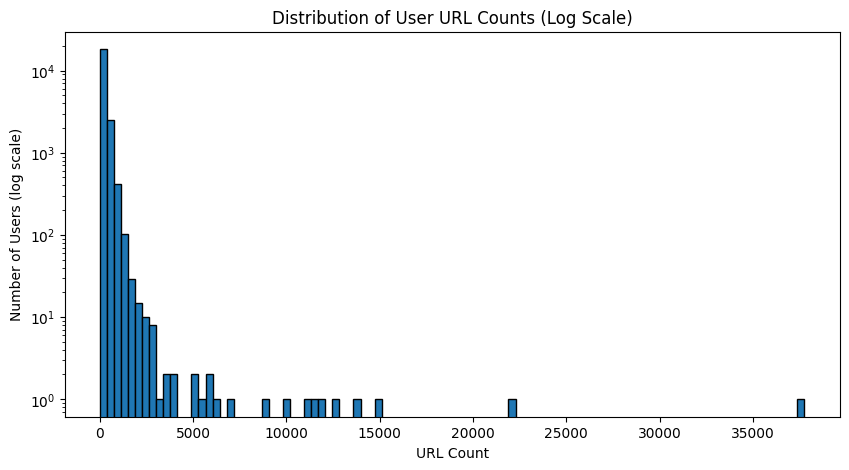

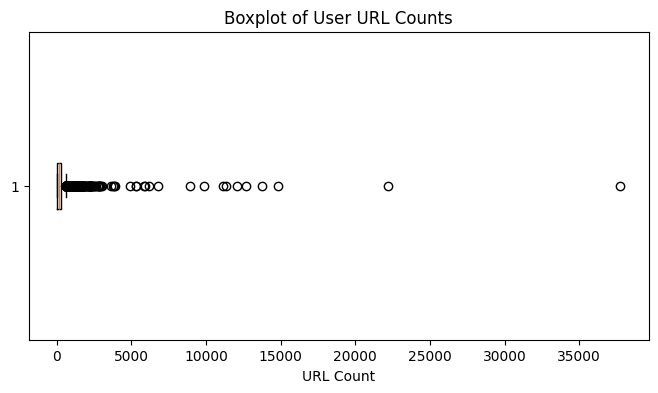

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

# 유저별 URL 개수 집계
user_url_count = log.groupby('user_uuid')['URL'].nunique().reset_index(name='url_count')

# z-score 계산
user_url_count['z_score'] = zscore(user_url_count['url_count'])


# 기본 통계 요약
desc = user_url_count['url_count'].describe()
print("📊 기본 통계")
print(desc)
print()

# IQR 기반 이상치 경계 계산
Q1 = desc['25%']
Q3 = desc['75%']
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = user_url_count[
    (user_url_count['url_count'] > upper_bound) | 
    (user_url_count['url_count'] < lower_bound)
]
outlier_ratio = len(outliers) / len(user_url_count) * 100

print(f"🚨 이상치로 분류된 유저 수: {len(outliers):,}명 ({outlier_ratio:.2f}%)")
print(f"상위 경계값 (IQR 기준): {upper_bound:.2f}")
print()

# z-score 계산
user_url_count['z_score'] = (
    (user_url_count['url_count'] - user_url_count['url_count'].mean()) /
    user_url_count['url_count'].std()
)

# 상위 10명
top_users = user_url_count.sort_values('z_score', ascending=False).head(10)
print("🏆 URL을 가장 많이 가진 상위 10명")
print(top_users)

# 시각화 1: 전체 분포 (로그 스케일로 보기)
plt.figure(figsize=(10,5))
plt.hist(user_url_count['url_count'], bins=100, edgecolor='black', log=True)
plt.title("Distribution of User URL Counts (Log Scale)")
plt.xlabel("URL Count")
plt.ylabel("Number of Users (log scale)")
plt.show()

# 시각화 2: Boxplot으로 이상치 보기
plt.figure(figsize=(8,4))
plt.boxplot(user_url_count['url_count'], vert=False, showfliers=True)
plt.title("Boxplot of User URL Counts")
plt.xlabel("URL Count")
plt.show()

In [22]:
# 1️⃣ 상위 0.1% 기준값 계산
threshold_1 = user_url_count['url_count'].quantile(0.999)
print(f"🚀 상위 1% URL 수 기준값: {threshold_1:.0f}")

# 2️⃣ 이상치 유저 (상위 0.1%)
outlier_users = user_url_count[user_url_count['url_count'] > threshold_1]['user_uuid']

# 3️⃣ filtered_log에서 이상치 유저 제거
filtered_log_trimmed = log[~log['user_uuid'].isin(outlier_users)]

# 4️⃣ 로그 및 유저 수 비교 출력
print(f"✅ 원본 유저 수: {log['user_uuid'].nunique():,}")
print(f"🚫 제거된 이상치 유저 수: {len(outlier_users):,}")
print(f"📊 정제된 유저 수: {filtered_log_trimmed['user_uuid'].nunique():,}")
print(f"🪶 원본 로그 개수: {len(log):,}")
print(f"📉 정제된 로그 개수: {len(filtered_log_trimmed):,}")

🚀 상위 1% URL 수 기준값: 3021
✅ 원본 유저 수: 21,348
🚫 제거된 이상치 유저 수: 22
📊 정제된 유저 수: 21,326
🪶 원본 로그 개수: 16,597,751
📉 정제된 로그 개수: 15,826,350


- 유저당 로그수가 비정상적으로 많이 나타나는 계정은 테스트 계정이거나 데이터의 신뢰도를 해칠 수 있기에 제거

### response_code가 비정상으로 로드된 것 제외

In [23]:
filtered_log_trimmed['response_code'].value_counts()

response_code
200    15500874
302      199195
400       62133
404       48169
409       10173
500        2995
401        1358
405        1206
503         100
403          93
301          54
Name: count, dtype: int64

| 코드      | 의미                    | 해석                                             |
| ------- | --------------------- | ---------------------------------------------- |
| **200** | OK                    | 정상 응답 (페이지/요청 성공) ✅                            |
| **302** | Found / Redirect      | 로그인 후 리다이렉트 등, 대부분 정상 플로우에서 사용됨 (조건부 유지 가능) ⚙️ |
| **400** | Bad Request           | 잘못된 요청 — 클라이언트 오류 🚫                           |
| **404** | Not Found             | 존재하지 않는 URL 요청 🚫                              |
| **409** | Conflict              | 중복 요청 등 논리 충돌 — 보통 비정상 🚫                      |
| **500** | Internal Server Error | 서버 오류 🚫                                       |
| **401** | Unauthorized          | 인증 실패 — 로그인 오류 🚫                              |
| **405** | Method Not Allowed    | 허용되지 않은 메서드 (보통 API 잘못 호출) 🚫                  |
| **503** | Service Unavailable   | 서버 다운/점검 상태 🚫                                 |
| **403** | Forbidden             | 접근 권한 없음 🚫                                    |
| **301** | Moved Permanently     | URL 영구 이동 (정상 리다이렉트일 수도 있음) ⚙️                 |

In [24]:
valid_codes = [200, 302, 301]
log_valid = filtered_log_trimmed[filtered_log_trimmed['response_code'].isin(valid_codes)]

print(f"✅ 원본 로그 개수: {len(log):,}")
print(f"📊 정상 응답 로그 개수: {len(log_valid):,}")
print(f"🚫 제거된 오류 로그 개수: {len(log) - len(log_valid):,}")

✅ 원본 로그 개수: 16,597,751
📊 정상 응답 로그 개수: 15,700,123
🚫 제거된 오류 로그 개수: 897,628


In [25]:
log_valid['user_uuid'].nunique()

21318

### 세션 분할 및 이상치 제거

- 30분 이상 활동하지 않으면 세션이 종료된 것으로 판단하여 세션을 분할함

In [26]:
# 0. 원본 준비
df = log_valid.copy()
df['timestamp_kst'] = pd.to_datetime(df['timestamp_kst'], errors='coerce')

# 1. 유저별 시간순 정렬
df = df.sort_values(['user_uuid', 'timestamp_kst']).copy()

# 2. 이전 이벤트와 시간 차이
df['gap'] = df.groupby('user_uuid')['timestamp_kst'].diff()

# 3. 새 세션 시작 여부 (첫 이벤트 포함)
threshold = pd.Timedelta(minutes=30)
df['is_new_session'] = df['gap'].isna() | (df['gap'] > threshold)

# 4. 유저별 세션 번호(1부터 시작). 0부터 원하면 -1 해도 됨
df['session_id'] = df.groupby('user_uuid')['is_new_session'].cumsum().astype(int)

# 5. 유저별 세션 개수 집계 (session_id가 1부터 시작이므로 최댓값이 곧 세션 수)
sessions_per_user = (
    df.groupby('user_uuid')['session_id']
      .max()
      .reset_index(name='session_count')
)

# 6. 전체 요약/확인
print(sessions_per_user.describe())           # 세션 개수 분포 요약
print(sessions_per_user.sort_values('session_count', ascending=False).head(50))  # 세션 많은 상위 50명

       session_count
count   21318.000000
mean       41.178581
std        82.417025
min         1.000000
25%         4.000000
50%        15.000000
75%        45.000000
max      2186.000000
                                  user_uuid  session_count
7786   5db4e578-07c9-4e97-8e35-2905be7e895f           2186
1563   12cee125-fad4-4638-9073-9d85adc1618f           2077
4434   360b6148-7c13-4527-b7c7-356434ab2da8           1807
20134  f2480b48-1c78-48c9-9ca0-b5a3a16db842           1713
3483   2a6ce163-c7f2-4e34-b3d6-92d8e29d4958           1318
1513   123d2e4a-4af9-4e4c-ad24-55072609f70f           1303
11273  874fc78d-4187-4da3-aadb-20f7ab66954d           1275
18080  d8cf3fe7-e863-4762-8878-b25ed1a13a3f           1177
20606  f7a7fbbf-ca69-46cb-8713-d653199fe093           1154
7517   5a83b3f3-cb98-4b68-9521-48d4cfb5d451           1140
5561   43b26027-027f-4aff-bc88-8a979f85a693           1135
4483   36b04ad7-d7c0-4c0a-944b-c15da1e71ab2           1110
21035  fcd13431-8f24-4825-bcad-484f8eaf7537 

In [27]:
df.tail()

,user_uuid,URL,timestamp,date,response_code,method,timestamp_kst,new_user,gap,is_new_session,session_id
11374505,ffff25ca-c1d7-4fc2-891b-b0df92f95092,api/users/id/template,2023-12-18 15:06:35.877009+00:00,2023-12-19,200,POST,2023-12-19 00:06:35.877009+09:00,0,0 days 00:00:00.503371,False,97
11374483,ffff25ca-c1d7-4fc2-891b-b0df92f95092,@user_id,2023-12-18 15:06:36.763225+00:00,2023-12-19,200,GET,2023-12-19 00:06:36.763225+09:00,0,0 days 00:00:00.886216,False,97
11374414,ffff25ca-c1d7-4fc2-891b-b0df92f95092,api/users/id/template,2023-12-18 15:06:37.210715+00:00,2023-12-19,200,POST,2023-12-19 00:06:37.210715+09:00,0,0 days 00:00:00.447490,False,97
11374403,ffff25ca-c1d7-4fc2-891b-b0df92f95092,jobs,2023-12-18 15:06:46.206558+00:00,2023-12-19,200,GET,2023-12-19 00:06:46.206558+09:00,0,0 days 00:00:08.995843,False,97
11374399,ffff25ca-c1d7-4fc2-891b-b0df92f95092,api/jobs/job_title?job=1,2023-12-18 15:06:47.011844+00:00,2023-12-19,200,GET,2023-12-19 00:06:47.011844+09:00,0,0 days 00:00:00.805286,False,97


count    21318.000000
mean        41.178581
std         82.417025
min          1.000000
25%          4.000000
50%         15.000000
75%         45.000000
max       2186.000000
Name: session_count, dtype: float64


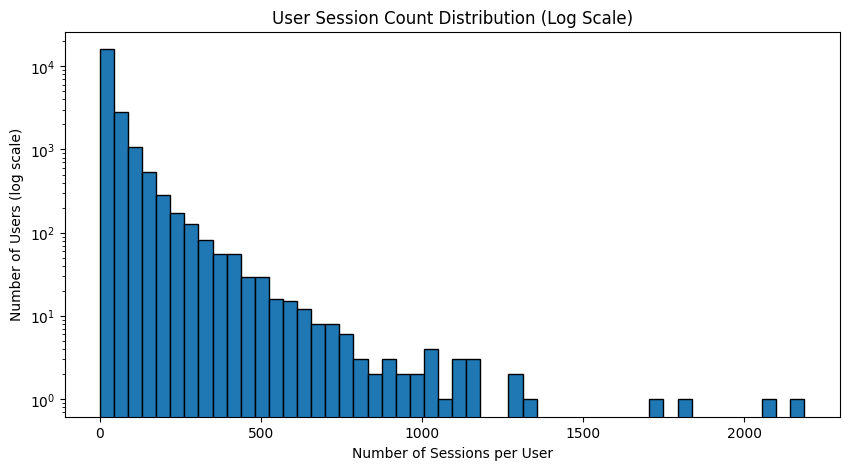

In [28]:
# 1️. 유저별 세션 개수 계산
session_count = (
    df.groupby('user_uuid')['session_id']
      .nunique()
      .reset_index(name='session_count')
)

# 2️. 분포 요약
print(session_count['session_count'].describe())

# 3. 시각화
plt.figure(figsize=(10,5))
plt.hist(session_count['session_count'], bins=50, edgecolor='black', log=True)
plt.title('User Session Count Distribution (Log Scale)')
plt.xlabel('Number of Sessions per User')
plt.ylabel('Number of Users (log scale)')
plt.show()

In [29]:
# -------------------------
# 1) URL 기준 outlier 유저
# -------------------------

# user_url_count: user_uuid별 url_count가 담긴 테이블이어야 함
url_thr = user_url_count['url_count'].quantile(0.999)  # 예: 1086
url_outliers = set(user_url_count[user_url_count['url_count'] > url_thr]['user_uuid'])

print(f"URL 상위 0.1% 기준값: {url_thr}")
print(f"URL 상위 0.1% 유저 수: {len(url_outliers)}")


# -------------------------
# 2) 세션 기준 outlier 유저
# -------------------------

# session_count: user_uuid별 session_count 테이블이어야 함
session_thr = session_count['session_count'].quantile(0.999)
session_outliers = set(session_count[session_count['session_count'] > session_thr]['user_uuid'])

print(f"\n세션 상위 0.1% 기준값: {session_thr}")
print(f"세션 상위 0.1% 유저 수: {len(session_outliers)}")


# -------------------------
# 3) 두 조건 모두 만족하는 유저 (교집합)
# -------------------------
both_outliers = url_outliers & session_outliers

print("\n==============================")
print(f"URL & 세션 둘 다 상위 1%인 유저 수: {len(both_outliers)}")
print("==============================")

URL 상위 0.1% 기준값: 3021.464000000182
URL 상위 0.1% 유저 수: 22

세션 상위 0.1% 기준값: 929.343000000019
세션 상위 0.1% 유저 수: 22

URL & 세션 둘 다 상위 1%인 유저 수: 0


- URL도 많고 세션도 많은 유저는 존재하지 않음
- 이미 URL이 많은 유저가 제거됨
- 세션이 극도로 많은 유저는 제거
- 2만명 중 22명 = 0.1% -> 보수적으로 제거

In [30]:
session_thr = session_count['session_count'].quantile(0.999)  # 0.1%
session_outliers = set(session_count[session_count['session_count'] > session_thr]['user_uuid'])

df_trim2 = df[~df['user_uuid'].isin(session_outliers)]

print(f"원본 유저 수: {df['user_uuid'].nunique():,}")
print(f"제거된 세션 이상치 수: {len(session_outliers):,}")
print(f"정제 후 유저 수: {df_trim2['user_uuid'].nunique():,}")

원본 유저 수: 21,318
제거된 세션 이상치 수: 22
정제 후 유저 수: 21,296


### URL 분류

In [31]:
df_trim2[df_trim2['gap'].isnull()].tail()

,user_uuid,URL,timestamp,date,response_code,method,timestamp_kst,new_user,gap,is_new_session,session_id
9674835,fff082bd-c063-4d10-be2d-b2b53f54527e,api/users/notifications/mark_read?id=4759532&_...,2022-12-22 08:07:12.244799+00:00,2022-12-22,200,GET,2022-12-22 17:07:12.244799+09:00,0,NaT,True,1
15506299,fff3440e-7c0a-485b-a392-c41023060e96,continue?next=/jobs/139147/apply/step1,2023-01-02 03:16:13.747792+00:00,2023-01-02,302,GET,2023-01-02 12:16:13.747792+09:00,0,NaT,True,1
7994728,fff45252-3c40-4805-99e9-6b650c1fca80,signup/detail?next_url=/signup/detail,2022-12-27 01:01:21.130353+00:00,2022-12-27,302,GET,2022-12-27 10:01:21.130353+09:00,1,NaT,True,1
9370887,fff8a5c0-c85b-4e30-a22d-ed61b4480615,signup/detail,2022-03-23 11:57:34.460373+00:00,2022-03-23,302,GET,2022-03-23 20:57:34.460373+09:00,0,NaT,True,1
7022235,ffff25ca-c1d7-4fc2-891b-b0df92f95092,companies/company_id/jobs,2022-01-20 00:29:12.183205+00:00,2022-01-20,200,GET,2022-01-20 09:29:12.183205+09:00,0,NaT,True,1


- URL과 관련한 정리 문서가 존재하지 않아, 실제 채용플랫폼 사이트와 URL을 비교하여 분류 진행

In [32]:
import re

# =====================================
# 0) classify_action 함수(URL 분류 함수)
# =====================================
def classify_action(cleaned_URL, method=None):
    if pd.isna(cleaned_URL):
        return '빈 URL'
    cleaned_URL = str(cleaned_URL).lower().strip()
    if cleaned_URL == '':
        return '빈 URL'

    if method:
        method = str(method).strip().lower()

    # 3. 회원가입 관련
    if 'signup' in cleaned_URL and 'done' in cleaned_URL:
        return '회원가입완료'
    elif 'signup' in cleaned_URL:
        return '회원가입 페이지 진입'

    # 4. 지원 흐름
    if 'apply_progress' in cleaned_URL:
        return '지원 진행 상태 확인'
    elif 'application' in cleaned_URL or 'resume' in cleaned_URL:
        return '지원서 업데이트'
    elif 'apply' in cleaned_URL and 'step4' in cleaned_URL:
        if method == 'post':
            return '지원서 작성 - 제출 완료'
        else:
            return '지원서 작성 - step4'
    elif 'apply' in cleaned_URL and 'step3' in cleaned_URL:
        return '지원서 작성 - step3'
    elif 'apply' in cleaned_URL and 'step2' in cleaned_URL:
        return '지원서 작성 - step2'
    elif 'apply' in cleaned_URL and 'step1' in cleaned_URL:
        return '지원서 작성 - step1'
    elif 'apply' in cleaned_URL:
        return '지원서 작성 - 페이지 진입'
    
    # 5. 채용 관련
    if 'job' in cleaned_URL and 'bookmark' in cleaned_URL:
        return '채용공고 북마크'
    elif 'job' in cleaned_URL or 'recruit' in cleaned_URL:
        return '채용정보 조회'
    elif ('companies' in cleaned_URL or 'company'in cleaned_URL) and 'member' in cleaned_URL:
        return '기업 구성원 프로필 조회'
    elif (('companies' in cleaned_URL or 'company' in cleaned_URL) and 'view' in cleaned_URL) or 'companies/company_id' in cleaned_URL:
        return '채용 기업 페이지 조회'
    elif ('companies' in cleaned_URL) and 'bookmark' in cleaned_URL:
        return '채용 기업 북마크'

    # 6. 추천/가이드
    if 'recommend' in cleaned_URL:
        return '추천 서비스'
    elif 'current_guided_action' in cleaned_URL:
        return '가이드 액션 확인'
    elif 'guided_action/add_sns_card' in cleaned_URL:
        return '가이드-개인 웹사이트/SNS 입력'
    elif 'guided_action/add_specialty_card' in cleaned_URL:
        return '가이드-전문 분야 입력'
    elif 'guided_action/add_language_card' in cleaned_URL:
        return '가이드-언어 입력'
    elif 'guided_action/add_career_card' in cleaned_URL:
        return '가이드-경력 입력'
    elif 'guided_action/add_news_card' in cleaned_URL:
        return '가이드-뉴스/미디어 입력'
    elif 'guided_action/add_overview_card' in cleaned_URL:
        return '가이드-개요 입력'
    elif 'guided_action/add_funding_card' in cleaned_URL:
        return '가이드-펀딩 입력'
    
    # 7. 프로필 관련
    if any(x in cleaned_URL for x in ['profile', 'template', 'experience', 'education',
                                      'career', 'project', 'overview', 'image',
                                      'specialty', 'sns', 'certification', 'language', 'residence']):
        return '프로필 작성/수정'

    # 8. 일반 기능
    if 'search' in cleaned_URL:
        return '검색'
    elif 'setting' in cleaned_URL:
        return '설정'
    elif 'verify' in cleaned_URL:
        return '본인인증'
    elif 'notifications' in cleaned_URL:
        return '알림 확인'

    # 9. 소셜 기능
    if 'follower' in cleaned_URL or 'following' in cleaned_URL or 'bookmark' in cleaned_URL:
        return '소셜 기능'

    # 10. 기타
    return '기타'


# =====================================
# ⭐ 전처리 및 action 분류 파이프라인
# =====================================
df = df_trim2.copy()

print("🔥 Step 1. 정적 파일 제거")
df = df[~df['URL'].str.contains(r'\.(png|jpg|jpeg|css|js|svg|ico)$', regex=True, na=False)]

print("🔥 Step 2. querystring 제거")
df['cleaned_URL'] = df['URL'].str.split('?').str[0].str.lower().str.strip()

print("🔥 Step 3. 숫자 ID/UUID 정규화")
def normalize_url(url):
    if pd.isna(url):
        return url
    url = url.lower().strip()
    url = re.sub(r'/\d+', '/{id}', url)                   # 숫자 ID 정규화
    url = re.sub(r'/[0-9a-f-]{36}', '/{uuid}', url)       # UUID 정규화
    return url

df['cleaned_URL'] = df['cleaned_URL'].apply(normalize_url)

print("🔥 Step 4. method 정리")
if 'method' in df.columns:
    df['method_clean'] = df['method'].astype(str).str.lower().str.strip()
else:
    df['method_clean'] = None

print("🔥 Step 5. action_type 생성 (classify_action 적용)")
df['action'] = [
    classify_action(u, m)
    for u, m in zip(df['cleaned_URL'], df['method_clean'])
]

print("🔥 Step 6. 액션 분포 확인")
print(df['action'].value_counts())

# 최종 결과
df_final = df.copy()

🔥 Step 1. 정적 파일 제거


C:\Users\user\AppData\Local\Temp\ipykernel_18204\870560341.py:103: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[~df['URL'].str.contains(r'\.(png|jpg|jpeg|css|js|svg|ico)$', regex=True, na=False)]


🔥 Step 2. querystring 제거
🔥 Step 3. 숫자 ID/UUID 정규화
🔥 Step 4. method 정리
🔥 Step 5. action_type 생성 (classify_action 적용)
🔥 Step 6. 액션 분포 확인
action
채용정보 조회               4859651
프로필 작성/수정             2958715
기타                    2411533
채용 기업 페이지 조회           942886
추천 서비스                 728656
검색                     647255
지원서 업데이트               641315
가이드 액션 확인              346181
지원서 작성 - step1         317631
지원서 작성 - step2         289907
알림 확인                  230542
지원서 작성 - step3         183215
기업 구성원 프로필 조회          148514
지원 진행 상태 확인            133884
지원서 작성 - step4         105945
채용공고 북마크                95707
소셜 기능                   89606
지원서 작성 - 제출 완료          81413
회원가입 페이지 진입             56020
설정                      43751
지원서 작성 - 페이지 진입         21043
본인인증                    19115
채용 기업 북마크               15944
가이드-전문 분야 입력             6651
가이드-언어 입력                5531
가이드-개인 웹사이트/SNS 입력       5510
가이드-경력 입력                5391
회원가입완료                   5312
가이드-뉴스/미디어 입력     

In [33]:
df_final = df_final[df_final['action'] != '빈 URL']
df_final['action'].value_counts()

action
채용정보 조회               4859651
프로필 작성/수정             2958715
기타                    2411533
채용 기업 페이지 조회           942886
추천 서비스                 728656
검색                     647255
지원서 업데이트               641315
가이드 액션 확인              346181
지원서 작성 - step1         317631
지원서 작성 - step2         289907
알림 확인                  230542
지원서 작성 - step3         183215
기업 구성원 프로필 조회          148514
지원 진행 상태 확인            133884
지원서 작성 - step4         105945
채용공고 북마크                95707
소셜 기능                   89606
지원서 작성 - 제출 완료          81413
회원가입 페이지 진입             56020
설정                      43751
지원서 작성 - 페이지 진입         21043
본인인증                    19115
채용 기업 북마크               15944
가이드-전문 분야 입력             6651
가이드-언어 입력                5531
가이드-개인 웹사이트/SNS 입력       5510
가이드-경력 입력                5391
회원가입완료                   5312
가이드-뉴스/미디어 입력            4253
가이드-개요 입력                4159
가이드-펀딩 입력                1897
Name: count, dtype: int64

# 3. EDA

### 기본 로그 구조 파악

총 로그 수: 15407133
총 유저 수: 21296
action 종류: 31


<Axes: xlabel='timestamp_kst'>

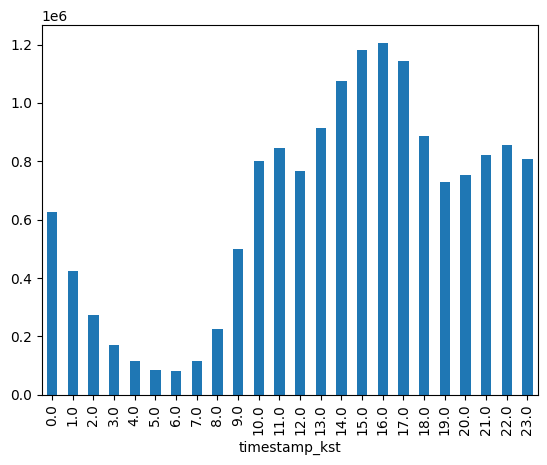

In [34]:
print("총 로그 수:", len(df_final))
print("총 유저 수:", df_final['user_uuid'].nunique())
print("action 종류:", df_final['action'].nunique())

df_final['action'].value_counts().head(20)
df_final['cleaned_URL'].value_counts().head(20)
df_final['timestamp_kst'].dt.hour.value_counts().sort_index().plot(kind='bar')

In [35]:
# 유저당 이벤트 수 분포
user_event = df_final.groupby('user_uuid')['action'].count()
user_event.describe()

count    21296.000000
mean       723.475441
std       1195.963197
min          1.000000
25%         69.000000
50%        313.000000
75%        875.000000
max      24544.000000
Name: action, dtype: float64

In [36]:
# 신규 vs 기존 유저 비교
df_final.groupby('new_user')['action'].value_counts(normalize=True)

new_user  action            
0         채용정보 조회               0.328156
          프로필 작성/수정             0.185774
          기타                    0.168249
          채용 기업 페이지 조회          0.067092
          추천 서비스                0.041788
          지원서 업데이트              0.039105
          검색                    0.034881
          가이드 액션 확인             0.023309
          지원서 작성 - step1        0.018355
          알림 확인                 0.016912
          지원서 작성 - step2        0.016534
          기업 구성원 프로필 조회         0.010868
          지원서 작성 - step3        0.010633
          지원 진행 상태 확인           0.007287
          채용공고 북마크              0.006161
          지원서 작성 - step4        0.006068
          소셜 기능                 0.005721
          지원서 작성 - 제출 완료        0.004702
          설정                    0.002819
          채용 기업 북마크             0.001101
          지원서 작성 - 페이지 진입       0.001075
          회원가입 페이지 진입           0.000986
          본인인증                  0.000780
          가이드-전문 분야 입력      

In [37]:
# 유저가 제일 많이 하는 행동 Top10
df_final.groupby('user_uuid')['action'].agg(lambda x: x.mode()[0]).value_counts().head(10)

action
채용정보 조회         9541
프로필 작성/수정       6188
기타              4163
채용 기업 페이지 조회     493
설정               284
검색               241
지원서 업데이트         151
가이드 액션 확인         67
회원가입 페이지 진입       40
알림 확인             36
Name: count, dtype: int64

### 세션 기반 EDA

In [38]:
# 유저당 세션 수 분포
session_count['session_count'].describe()

count    21318.000000
mean        41.178581
std         82.417025
min          1.000000
25%          4.000000
50%         15.000000
75%         45.000000
max       2186.000000
Name: session_count, dtype: float64

In [39]:
# 세션 길이 / 이벤트 수
session_stats = df_final.groupby(['user_uuid','session_id']).agg(
    session_start=('timestamp_kst','min'),
    session_end=('timestamp_kst','max'),
    events=('action','count')
)
session_stats['duration'] = (session_stats['session_end'] - session_stats['session_start']).dt.seconds

session_stats['duration'].describe()
session_stats['events'].describe()

count    850001.000000
mean         18.126017
std          40.047060
min           1.000000
25%           2.000000
50%           6.000000
75%          17.000000
max        5094.000000
Name: events, dtype: float64

In [40]:
# 세션 랜딩 페이지 분석(첫 방문)
df_final['is_first'] = df_final.groupby(['user_uuid','session_id']).cumcount() == 0
landing = df_final[df_final['is_first']]
landing['cleaned_URL'].value_counts().head(20)

cleaned_URL
jobs                                     137027
@user_id                                 132586
companies/company_id                      75693
jobs/id/id_title                          70601
continue                                  70520
@user_id/applications                     57606
api/users/notifications/mark_read         53612
suggest                                   42477
companies/company_id/jobs                 31004
api/timeline                              23053
@user_id/resume                           10970
@user_id/job_offer/received               10519
companies/company_id/jobs/job_title       10167
api/jobs/job_title                         8484
jobs/job_title                             8414
people                                     8092
api/users/id/card2/template                7152
signup/detail                              6958
api/users/id/template                      6926
api/users/notifications/mark_all_read      6238
Name: count, dtype: int64

### action 기반 행동 흐름 EDA

In [41]:
# action별 평균 체류시간
df_final['next_time'] = df_final.groupby(['user_uuid','session_id'])['timestamp_kst'].shift(-1)
df_final['duration'] = (df_final['next_time'] - df_final['timestamp_kst']).dt.seconds

df_final.groupby('action')['duration'].mean().sort_values(ascending=False).head(20)

action
지원서 작성 - step3    65.144230
지원서 업데이트          64.320361
기업 구성원 프로필 조회     47.479763
지원서 작성 - 제출 완료    46.409560
채용공고 북마크          39.545976
채용정보 조회           35.249115
지원서 작성 - step4    34.461496
설정                33.285379
채용 기업 페이지 조회      27.415621
소셜 기능             25.763155
프로필 작성/수정         24.844489
알림 확인             23.601982
추천 서비스            16.994930
회원가입완료            16.272346
본인인증              15.033129
채용 기업 북마크         12.017220
가이드-경력 입력         11.599626
가이드-펀딩 입력         11.230811
가이드 액션 확인         11.016412
지원 진행 상태 확인       10.693703
Name: duration, dtype: float64

In [42]:
# 0. 필요한 컬럼만 슬림하게 사용 (메모리 절약)
df = df_final[['user_uuid', 'timestamp_kst', 'new_user']].copy()

# 1. 월 단위 event_month, 최초 방문 cohort_month 계산
df['event_month'] = df['timestamp_kst'].dt.to_period('M')

first_visit = (
    df.groupby('user_uuid')['event_month']
      .min()
      .rename('cohort_month')
)

df = df.merge(first_visit, on='user_uuid', how='left')

# 2. 몇 번째 달인지(cohort_index: 1,2,3,...) 계산
df['cohort_index'] = (
    (df['event_month'].dt.year - df['cohort_month'].dt.year) * 12
    + (df['event_month'].dt.month - df['cohort_month'].dt.month)
) + 1

# 3. "해당 달에 활동한 유저" 집계 (신규/기존 + cohort_index 기준)
user_months = (
    df.groupby(['new_user', 'user_uuid', 'cohort_index'])
      .size()
      .reset_index(name='events')
)

active_users = (
    user_months.groupby(['new_user', 'cohort_index'])['user_uuid']
               .nunique()
               .reset_index(name='active_users')
)

# 4. 각 그룹(신규/기존)별 첫 달 유저 수 = 분모
base_users = (
    user_months[user_months['cohort_index'] == 1]
    .groupby('new_user')['user_uuid']
    .nunique()
    .rename('base_users')
)

# 5. 리텐션 비율 계산
ret = active_users.merge(base_users, on='new_user', how='left')
ret['retention'] = ret['active_users'] / ret['base_users']

# 6. 보기 좋게 pivot (index: 몇 번째 달, columns: new_user)
ret_pivot = (
    ret.pivot(index='cohort_index', columns='new_user', values='retention')
       .sort_index()
)

# new_user 컬럼 이름을 사람이 읽기 쉽게 변경 (0=기존, 1=신규)
ret_pivot = ret_pivot.rename(columns={0: '기존회원', 1: '신규회원'})

print("📊 신규/기존 월별 리텐션 (%)")
print((ret_pivot * 100).round(1))

C:\Users\user\AppData\Local\Temp\ipykernel_18204\2882972137.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['event_month'] = df['timestamp_kst'].dt.to_period('M')


📊 신규/기존 월별 리텐션 (%)
new_user       기존회원   신규회원
cohort_index              
-24298          NaN    0.0
-24290          NaN    0.0
-24288          0.0    NaN
-24284          NaN    0.0
-24281          NaN    0.0
-24280          NaN    0.0
-24279          0.0    0.0
-24277          0.1    0.0
 1            100.0  100.0
 2             48.9   69.6
 3             42.2   50.9
 4             37.1   40.1
 5             34.9   33.4
 6             32.9   27.7
 7             30.7   25.3
 8             29.1   23.0
 9             26.5   20.1
 10            25.6   18.4
 11            24.5   16.4
 12            23.7   15.2
 13            22.7   14.7
 14            22.0   13.1
 15            22.5   11.7
 16            20.4   10.0
 17            18.9    9.1
 18            15.4    7.5
 19            14.7    6.8
 20            13.7    5.2
 21            12.5    4.6
 22            11.0    3.6
 23            10.3    2.7
 24             7.4    1.5


- (-)값이 나오는 이유
    - 로그가 UTC → KST 변환할 때 실패
    - 원본 timestamp가 잘못된 값
    - 일부 유저가 event가 있는데 timestamp가 없는 행이 섞임
    - timestamp_kst가 Null이면 event_month도 NaT → cohort_index 계산 비정상

In [43]:
bad_users = df[df['cohort_index'] < 1]['user_uuid'].unique()
print(len(bad_users))
print(bad_users[:10])

22
['0db3397f-c15e-43e2-9583-42c31c050388'
 '12af6c34-83d1-4760-adfc-7f06fe214d4a'
 '15980022-e876-4af9-bfbe-aa3435709c36'
 '25d2a506-b21d-4bec-8fec-e5dc9d97ba15'
 '3cc34f35-e472-406a-8b44-026c6ce38dfc'
 '624f7077-6f9a-4599-b657-25687652cdf7'
 '636544d5-9af0-4f05-9a6f-70ef30576002'
 '9050f934-6026-4810-90dd-6bf8fc2cefbc'
 '9cac66fe-4f16-469c-b5e1-29f24264912c'
 '9cd1d0d9-a1df-423f-9e95-b4cd0caeae94']


In [44]:
df_bad = df[df['cohort_index'] < 0]
print(df_bad.shape)
df_bad.head()

(22, 6)


,user_uuid,timestamp_kst,new_user,event_month,cohort_month,cohort_index
851499,0db3397f-c15e-43e2-9583-42c31c050388,NaT,1,NaT,2022-04,-24280
1141170,12af6c34-83d1-4760-adfc-7f06fe214d4a,NaT,1,NaT,2022-03,-24279
1327825,15980022-e876-4af9-bfbe-aa3435709c36,NaT,0,NaT,2022-01,-24277
2323501,25d2a506-b21d-4bec-8fec-e5dc9d97ba15,NaT,1,NaT,2023-02,-24290
3651891,3cc34f35-e472-406a-8b44-026c6ce38dfc,NaT,0,NaT,2022-01,-24277


### 다시 리텐션 지표 분석

In [45]:
import pandas as pd

# 0) timestamp_kst를 datetime으로 (문자열이면)
df['timestamp_kst'] = pd.to_datetime(df['timestamp_kst'], errors='coerce')

# 1) 이벤트 없는 행 제거
df_clean = df[df['timestamp_kst'].notna()].copy()

# 2) 기존에 있던 관련 컬럼들 있으면 삭제 (깨끗하게 다시 만들기)
for col in ['event_month', 'cohort_month', 'cohort_index', 'user_type',
            'event_month_int', 'cohort_month_int']:
    if col in df_clean.columns:
        del df_clean[col]

# 3) 이벤트 월(Period) 만들기
df_clean['event_month'] = df_clean['timestamp_kst'].dt.to_period('M')

# 4) 유저별 첫 이용 달 = cohort_month (transform로 바로 붙이기)
df_clean['cohort_month'] = (
    df_clean
    .groupby('user_uuid')['event_month']
    .transform('min')
)

# 5) Period → int로 바꿔서 차이 계산 (에러 방지 포인트)
df_clean['event_month_int'] = df_clean['event_month'].astype('int64')
df_clean['cohort_month_int'] = df_clean['cohort_month'].astype('int64')

#   → 같은 코호트 내에서 month index 계산 (0,1,2,…) + 1 해서 1개월차부터 시작
df_clean['cohort_index'] = (
    df_clean['event_month_int'] - df_clean['cohort_month_int'] + 1
)

# 이상한 값 방어 (1개월차 이후만 사용)
df_clean = df_clean[df_clean['cohort_index'] >= 1]

# 6) 신규/기존 라벨링
df_clean['user_type'] = df_clean['new_user'].map({0: '기존회원', 1: '신규회원'})
df_clean = df_clean[df_clean['user_type'].notna()]  # 혹시 모를 NaN 제거

# 7) 코호트별 전체 유저 수 (cohort_size)
cohort_size = (
    df_clean
    .groupby(['cohort_month', 'user_type'])['user_uuid']
    .nunique()
    .rename('cohort_size')
)

# 8) 각 코호트가 N개월차에 몇 명이 돌아왔는지 (active_users)
active = (
    df_clean
    .groupby(['cohort_month', 'user_type', 'cohort_index'])['user_uuid']
    .nunique()
    .rename('active_users')
    .reset_index()
)

# 9) 코호트 크기 붙이고 리텐션(%) 계산
active = active.join(cohort_size, on=['cohort_month', 'user_type'])
active['retention_pct'] = active['active_users'] / active['cohort_size'] * 100

# 10) cohort_index 기준 전체(가중 평균) 리텐션 테이블 만들기
retention_table = (
    active
    .groupby(['cohort_index', 'user_type'])
    .agg({'active_users': 'sum', 'cohort_size': 'sum'})
    .assign(retention_pct=lambda x: x['active_users'] / x['cohort_size'] * 100)
    .reset_index()
    .pivot(index='cohort_index', columns='user_type', values='retention_pct')
    .sort_index()
    .round(1)  # 보기 좋게 소수점 한 자리
)

print("📊 신규/기존 월별 리텐션 (%)")
print(retention_table.to_string())

C:\Users\user\AppData\Local\Temp\ipykernel_18204\1210845093.py:16: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_clean['event_month'] = df_clean['timestamp_kst'].dt.to_period('M')


📊 신규/기존 월별 리텐션 (%)
user_type      기존회원   신규회원
cohort_index              
1             100.0  100.0
2              49.2   70.0
3              42.7   52.4
4              37.9   42.6
5              36.0   36.7
6              34.2   31.6
7              32.4   29.7
8              31.0   28.3
9              28.7   25.8
10             28.1   25.0
11             27.5   23.6
12             27.1   23.6
13             26.5   24.5
14             26.2   23.6
15             27.4   22.7
16             25.6   20.7
17             24.3   20.4
18             20.6   18.6
19             20.5   19.1
20             20.1   17.0
21             19.6   17.9
22             18.8   17.7
23             20.3   18.6
24             18.5   16.1


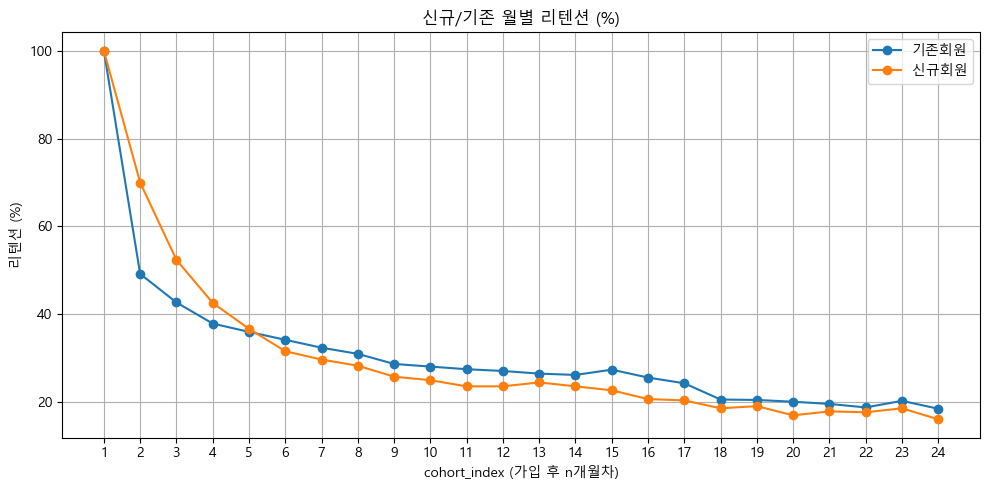

In [46]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')  # Windows 기본 한글 폰트
plt.rc('axes', unicode_minus=False)     # 음수 표시 가능하게

# 만약 retention_table이 아직 index가 cohort_index가 아니라면:
# retention_table = retention_table.set_index('cohort_index')

plt.figure(figsize=(10, 5))

# 기존회원 라인
plt.plot(
    retention_table.index,
    retention_table['기존회원'],
    marker='o',
    label='기존회원'
)

# 신규회원 라인
plt.plot(
    retention_table.index,
    retention_table['신규회원'],
    marker='o',
    label='신규회원'
)

plt.title('신규/기존 월별 리텐션 (%)')
plt.xlabel('cohort_index (가입 후 n개월차)')
plt.ylabel('리텐션 (%)')

plt.xticks(retention_table.index)  # 1~24 전부 표시하고 싶으면
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [47]:
df_clean.columns


Index(['user_uuid', 'timestamp_kst', 'new_user', 'event_month', 'cohort_month',
       'event_month_int', 'cohort_month_int', 'cohort_index', 'user_type'],
      dtype='object')

# 4. 가설 검증: 가이드 기능 임팩트 분석

- 분석 초기 단계에서 전체 플랫폼 리텐션을 살펴본 결과, 전체 유저의 30일 리텐션은 53.5% 수준으로 나타났으며, 특히 가입 후 48시간 내 이탈 비율이 13.7%에 달해 초기 온보딩 경험이 장기 리텐션에 결정적인 영향을 미친다는 점이 확인되었다.

- 분석 결과 신규 유저의 30일 리텐션은 69.6%로 전체 평균 대비 +16.1%p 높은 반면, 기존 유저는 48.9% 수준에 머물렀다.
- 이는 “처음 1~2일의 행동이 향후 잔존 여부를 크게 좌우한다”는 패턴을 시사하며, 초기 액션 중 어떤 행동이 리텐션을 견인하는지 규명할 필요성이 제기되었다.

- 초기 행동 로그를 전체적으로 비교해본 결과, 가입 직후 가장 높은 접촉률을 보이면서도 실제 효과가 정량적으로 검증된 적 없는 기능이 바로 가이드 기능이었다.

- 따라서 본 분석은 “가이드 기능 사용이 공고조회·지원 행동·장기 리텐션을 실제로 끌어올리는가?” 라는 명확한 가설을 설정하고, 리텐션 저하 문제의 원인을 규명하기 위한 핵심 분석으로 수행되었다.

## 가설

- 가설(H1)
    - 가이드 액션을 수행한 유저는 수행하지 않은 유저 대비 리텐션이 더 높다.
- 대안 가설(H2)
    - 가이드 액션은 특정 행동(예: 지원서 작성 진입, 공고 클릭 증가 등)을 촉진하여 결과적으로 리텐션에 간접적으로 기여한다.

## EDA

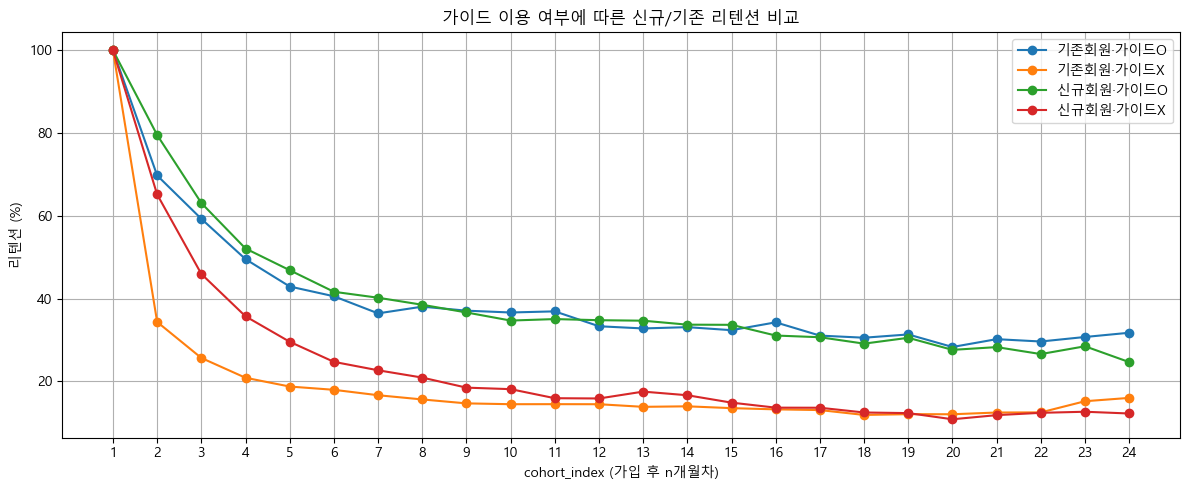

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 🔹 0. 원본 로그 데이터 지정 (여기만 네 이름에 맞게 바꿔줘!)
logs = df_final.copy()   # 예: logs = sort_log  이런 식으로

# 1) 원본 로그에서 유저별 가이드 사용 여부 계산
logs['is_guide'] = logs['action'].str.contains('가이드-', na=False)

user_guide = (
    logs
    .groupby('user_uuid')['is_guide']
    .any()                    # 한 번이라도 가이드 쓰면 True
    .rename('used_guide')
)

# 2) df_clean에 가이드 여부 붙이기 (없으면 False로)
df_ret = df_clean.merge(user_guide, on='user_uuid', how='left')
df_ret['used_guide'] = df_ret['used_guide'].fillna(False)

# 3) 리텐션 계산 함수 (cohort_month + cohort_index 기반)
def retention_by_group(data):
    active = (
        data
        .groupby(['cohort_month', 'cohort_index'])['user_uuid']
        .nunique()
        .reset_index()
    )

    cohort_size = (
        data
        .groupby('cohort_month')['user_uuid']
        .nunique()
        .rename('cohort_size')
    )

    active = active.join(cohort_size, on='cohort_month')
    active['retention'] = active['user_uuid'] / active['cohort_size'] * 100

    retention_avg = (
        active
        .groupby('cohort_index')['retention']
        .mean()
    )
    return retention_avg

# 4) 4개 그룹 나누기
existing_guide    = df_ret[(df_ret['user_type'] == '기존회원') & (df_ret['used_guide'])]
existing_noguide  = df_ret[(df_ret['user_type'] == '기존회원') & (~df_ret['used_guide'])]

new_guide         = df_ret[(df_ret['user_type'] == '신규회원') & (df_ret['used_guide'])]
new_noguide       = df_ret[(df_ret['user_type'] == '신규회원') & (~df_ret['used_guide'])]

# 5) 각 그룹 리텐션 계산
ret_existing_guide    = retention_by_group(existing_guide)
ret_existing_noguide  = retention_by_group(existing_noguide)
ret_new_guide         = retention_by_group(new_guide)
ret_new_noguide       = retention_by_group(new_noguide)

# 6) 시각화
plt.figure(figsize=(12, 5))

plt.plot(ret_existing_guide.index,   ret_existing_guide.values,   marker='o', label='기존회원·가이드O')
plt.plot(ret_existing_noguide.index, ret_existing_noguide.values, marker='o', label='기존회원·가이드X')

plt.plot(ret_new_guide.index,        ret_new_guide.values,        marker='o', label='신규회원·가이드O')
plt.plot(ret_new_noguide.index,      ret_new_noguide.values,      marker='o', label='신규회원·가이드X')

plt.title('가이드 이용 여부에 따른 신규/기존 리텐션 비교')
plt.xlabel('cohort_index (가입 후 n개월차)')
plt.ylabel('리텐션 (%)')
plt.grid(True)
plt.legend()
plt.xticks(range(1, int(df_ret['cohort_index'].max()) + 1))

plt.tight_layout()
plt.show()

In [49]:
# df_final.to_csv('df_final.csv')

- 유저별 행동 로그를 살펴보니 ‘가이드 기능’을 이용한 유저가 그렇지 않은 유저 대비 활동 유지율이 높다는 패턴을 확인했다. 따라서 가이드 기능이 실제로 리텐션에 기여하는지 검증이 필요했다고 판단했다.

### 가이드 기능 사용 유저 수 파악

In [50]:
# 가이드 여부 판별: action_type이 '가이드-'로 시작하면 O
logs['guide_flag'] = logs['action'].str.startswith('가이드')

# 유저 단위
guide_user = logs.groupby('user_uuid')['guide_flag'].max().reset_index()

total_users = guide_user.shape[0]
guide_users = guide_user['guide_flag'].sum()
nonguide_users = total_users - guide_users

print("전체 유저 수:", total_users)
print("가이드 사용 유저 수:", guide_users)
print("비사용 유저 수:", nonguide_users)
print("가이드 사용률(%):", round(guide_users / total_users * 100, 2))

전체 유저 수: 21296
가이드 사용 유저 수: 16984
비사용 유저 수: 4312
가이드 사용률(%): 79.75


### 가이드별 사용 빈도 분석

In [51]:
guide_usage_count = (
    logs[logs['guide_flag']]
    .groupby('user_uuid')
    .size()
    .reset_index(name='guide_action_count')
)

guide_usage_count['guide_action_count'].describe()

count    16984.000000
mean        22.348858
std         43.439499
min          1.000000
25%          3.000000
50%          9.000000
75%         25.000000
max       1651.000000
Name: guide_action_count, dtype: float64

### 가이드 기능 종류별 사용량

In [52]:
guide_type_usage = (
    logs[logs['guide_flag']]
    .groupby('action')
    .size()
    .sort_values(ascending=False)
)

guide_type_usage


action
가이드 액션 확인             346181
가이드-전문 분야 입력            6651
가이드-언어 입력               5531
가이드-개인 웹사이트/SNS 입력      5510
가이드-경력 입력               5391
가이드-뉴스/미디어 입력           4253
가이드-개요 입력               4159
가이드-펀딩 입력               1897
dtype: int64

### 유저별 가이드 카드 사용 개수

In [53]:
guide_card_counts = (
    logs[logs['guide_flag']]
    .groupby(['user_uuid', 'action'])
    .size()
    .reset_index()
    .groupby('user_uuid')['action']
    .nunique()
    .reset_index(name='unique_guide_cards')
)

guide_card_counts.describe()

,unique_guide_cards
count,16984.000000
mean,1.945301
std,1.899311
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,8.000000


### 가이드 사용 시점 분석

In [54]:
# 회원가입 시점 재정립
signup_log = logs[logs['action'] == '회원가입완료']
signup_time_from_log = (
    signup_log.groupby('user_uuid')['timestamp_kst'].min().reset_index()
)
signup_time_from_log.columns = ['user_uuid', 'signup_time']

first_action_as_signup = (
    logs.groupby('user_uuid')['timestamp_kst']
    .min()
    .reset_index(name='signup_time')
)

signup_time_df = first_action_as_signup.merge(
    signup_time_from_log, on='user_uuid', how='left'
)

signup_time_df['final_signup_time'] = signup_time_df[['signup_time_x','signup_time_y']].min(axis=1)
signup_time_df = signup_time_df[['user_uuid','final_signup_time']]
signup_time_df.columns = ['user_uuid','signup_time']

In [55]:
# 1) 첫 가이드 액션
first_guide_time = (
    logs[logs['action'].str.startswith('가이드')]
    .groupby('user_uuid')['timestamp_kst']
    .min()
    .reset_index(name='first_guide_at')
)

# 2) signup_time merge
guide_with_signup = first_guide_time.merge(signup_time_df, on='user_uuid', how='left')

# 3) days_after_signup
guide_with_signup['days_after_signup'] = (
    guide_with_signup['first_guide_at'] - guide_with_signup['signup_time']
).dt.total_seconds() / 86400

guide_with_signup['days_after_signup'].describe()

count    16984.000000
mean        51.225078
std        110.130960
min          0.000000
25%          0.000701
50%          0.171194
75%         41.508901
max        720.090727
Name: days_after_signup, dtype: float64

- 전체 가이드 사용자 16,984명 중 50%는 가입 후 4시간 이내에 가이드 기능을 처음 사용했다.

- 25%는 가입 후 1분 이내로 사용하여, 가이드 기능이 강력한 Onboarding 기능임을 보여준다.

- 반면, 25%의 유저는 가입 후 1개월 이상이 지난 시점에 가이드를 처음 사용했으며, 이는 가이드 기능이 재활성화(Reactivation) 시점에도 활용되고 있음을 시사한다.

- max 720일 등 일부 극단값은 로그 기반 가입 시점 산출 과정에서 발생한 데이터 누적 효과로 판단되어 분석에서 제거 필요.

In [56]:
guide_with_signup_clean = guide_with_signup[
    (guide_with_signup['days_after_signup'] >= 0) &
    (guide_with_signup['days_after_signup'] <= 180)
]
guide_with_signup_clean.tail()

,user_uuid,first_guide_at,signup_time,days_after_signup
16979,ffef51e0-b3b2-425c-9f29-2165dada54f0,2022-02-21 16:58:45.676250+09:00,2022-01-05 01:50:14.147257+09:00,47.630920
16980,fff082bd-c063-4d10-be2d-b2b53f54527e,2022-12-22 17:11:15.276118+09:00,2022-12-22 17:07:12.244799+09:00,0.002813
16981,fff3440e-7c0a-485b-a392-c41023060e96,2023-01-18 17:47:52.481036+09:00,2023-01-02 12:16:13.747792+09:00,16.230309
16982,fff8a5c0-c85b-4e30-a22d-ed61b4480615,2022-04-14 17:51:47.910009+09:00,2022-03-23 20:57:34.460373+09:00,21.870989
16983,ffff25ca-c1d7-4fc2-891b-b0df92f95092,2022-02-18 23:58:22.578330+09:00,2022-01-20 09:29:12.183205+09:00,29.603593


### 채용공고 조회 횟수 비교

In [57]:
# 공고 조회
logs["job_view"] = (logs["action"] == "채용정보 조회").astype(int)

job_view_summary = (
    logs.groupby("user_uuid")["job_view"].sum().reset_index()
    .merge(guide_user, on="user_uuid", how="left")
)

job_view_summary.groupby("guide_flag")["job_view"].mean()

guide_flag
False     35.865955
True     277.025259
Name: job_view, dtype: float64

### 프로필 수정률 비교

In [58]:
logs["profile_edit"] = (logs["action"] == "프로필 작성/수정").astype(int)

profile_summary = (
    logs.groupby("user_uuid")["profile_edit"].sum().reset_index()
    .merge(guide_user, on="user_uuid", how="left")
)

profile_summary.groupby("guide_flag")["profile_edit"].mean()


guide_flag
False     16.376623
True     170.048222
Name: profile_edit, dtype: float64

### 지원서 작성 진입률(step1~4) 비교

In [59]:
logs["apply_step"] = logs["action"].str.contains("지원서 작성").astype(int)

apply_step_summary = (
    logs.groupby("user_uuid")["apply_step"].max().reset_index()
    .merge(guide_user, on="user_uuid", how="left")
)

apply_step_summary.groupby("guide_flag")["apply_step"].mean() * 100


guide_flag
False    24.281076
True     61.987753
Name: apply_step, dtype: float64

### 지원서 제출률 비교

In [60]:
logs["apply_submit"] = (logs["action"] == "지원서 작성 - 제출 완료").astype(int)

submit_summary = (
    logs.groupby("user_uuid")["apply_submit"].max().reset_index()
    .merge(guide_user, on="user_uuid", how="left")
)

submit_summary.groupby("guide_flag")["apply_submit"].mean() * 100

guide_flag
False    17.393321
True     55.587612
Name: apply_submit, dtype: float64

## 퍼널 분석

In [61]:
logs["guide_flag"] = logs["action"].str.startswith("가이드").astype(int)

logs["view_job"] = (logs["action"] == "채용정보 조회").astype(int)
logs["apply_step"] = logs["action"].str.contains("지원서 작성").astype(int)
logs["apply_submit"] = (logs["action"] == "지원서 작성 - 제출 완료").astype(int)
logs["company_view"] = (logs["action"] == "채용 기업 페이지 조회").astype(int)
logs["bookmark"] = logs["action"].str.contains("북마크").astype(int)

In [62]:
funnel = (
    logs.groupby("user_uuid")[[
        "guide_flag",
        "view_job",
        "company_view",
        "bookmark",
        "apply_step",
        "apply_submit"
    ]].max().reset_index()
)


In [63]:
conversion = funnel.groupby("guide_flag")[[
    "view_job",
    "company_view",
    "bookmark",
    "apply_step",
    "apply_submit"
]].mean() * 100

conversion


,view_job,company_view,bookmark,apply_step,apply_submit
guide_flag,,,,,
0,74.744898,55.890538,10.946197,24.281076,17.393321
1,93.629298,88.724682,42.881536,61.987753,55.587612


| 단계                    | 가이드 X | 가이드 O     | 차이(= Uplift) |
| --------------------- | ----- | --------- | ------------ |
| 공고 조회(view_job)       | 74.7% | **93.6%** | **+18.9%p**  |
| 기업 페이지(company_view)  | 55.9% | **88.7%** | **+32.8%p**  |
| 북마크(bookmark)         | 10.9% | **42.9%** | **+32.0%p**  |
| 지원서 작성 진입(apply_step) | 24.3% | **61.9%** | **+37.7%p**  |
| 지원서 제출(apply_submit)  | 17.3% | **55.6%** | **+38.2%p**  |


In [64]:
conversion = funnel.groupby("guide_flag")[[
    "view_job",
    "company_view",
    "bookmark",
    "apply_step",
    "apply_submit"
]].mean() * 100

In [65]:
# 퍼널 단계 정의
steps = ["view_job", "company_view", "bookmark", "apply_step", "apply_submit"]

funnel_plot_df = conversion[steps].T
funnel_plot_df.columns = ["guideX", "guideO"]   # guide_flag: 0 → guideX, 1 → guideO
funnel_plot_df

,guideX,guideO
view_job,74.744898,93.629298
company_view,55.890538,88.724682
bookmark,10.946197,42.881536
apply_step,24.281076,61.987753
apply_submit,17.393321,55.587612


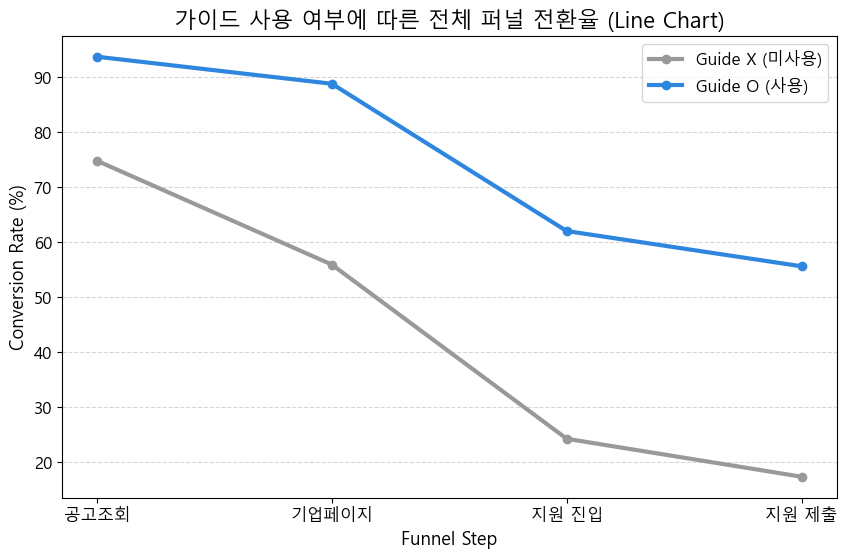

In [66]:
import matplotlib.pyplot as plt

# 퍼널 단계 순서 정의
steps = ["view_job", "company_view", "apply_step", "apply_submit"]
step_labels = ["공고조회", "기업페이지", "지원 진입", "지원 제출"]

# GuideX(0), GuideO(1) 값 추출
guideX = conversion.loc[0, steps].values
guideO = conversion.loc[1, steps].values

plt.figure(figsize=(10,6))

# 선 그래프 2개
plt.plot(step_labels, guideX, marker='o', linewidth=3, label="Guide X (미사용)", color="#999999")
plt.plot(step_labels, guideO, marker='o', linewidth=3, label="Guide O (사용)", color="#2E86DE")

# 제목 / 축 / 스타일
plt.title("가이드 사용 여부에 따른 전체 퍼널 전환율 (Line Chart)", fontsize=16)
plt.xlabel("Funnel Step", fontsize=13)
plt.ylabel("Conversion Rate (%)", fontsize=13)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


## 리텐션 계산

In [67]:
# 일단 timestamp_kst를 datetime으로 확실하게 변환했는지 체크
logs["timestamp_kst"] = pd.to_datetime(logs["timestamp_kst"], errors="coerce")

# 유저별 첫 행동 = 가입 시점
logs["signup_time"] = logs.groupby("user_uuid")["timestamp_kst"].transform("min")

# 가입월 / 이벤트월
logs["cohort_month"] = logs["signup_time"].dt.to_period("M")
logs["event_month"]  = logs["timestamp_kst"].dt.to_period("M")

# 여기까지 만든 후 NaT 체크
print(logs[["timestamp_kst", "signup_time", "cohort_month", "event_month"]].isna().sum())

C:\Users\user\AppData\Local\Temp\ipykernel_18204\3261914885.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  logs["cohort_month"] = logs["signup_time"].dt.to_period("M")
C:\Users\user\AppData\Local\Temp\ipykernel_18204\3261914885.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  logs["event_month"]  = logs["timestamp_kst"].dt.to_period("M")


timestamp_kst    22
signup_time       0
cohort_month      0
event_month      22
dtype: int64


In [68]:
# cohort_month, event_month 둘 다 있는 row만 사용
logs_clean = logs.dropna(subset=["cohort_month", "event_month"]).copy()

In [69]:
em = logs_clean["event_month"]
cm = logs_clean["cohort_month"]

logs_clean["cohort_index"] = (
    (em.dt.year - cm.dt.year) * 12
    + (em.dt.month - cm.dt.month)
)

In [70]:
user_month_activity = (
    logs_clean.groupby(["user_uuid", "cohort_index"])
    .size()
    .reset_index(name="active_flag")
)
user_month_activity["active_flag"] = 1

In [71]:
logs_clean["guide_flag"] = logs_clean["action"].str.startswith("가이드").astype(int)

guide_user = (
    logs_clean.groupby("user_uuid")["guide_flag"]
    .max()
    .reset_index()
)

In [72]:
ret_guide = user_month_activity.merge(guide_user, on="user_uuid", how="left")

retention_by_guide = (
    ret_guide.groupby(["guide_flag", "cohort_index"])["user_uuid"]
    .nunique()
    .reset_index(name="active_users")
)

In [73]:
guide_cohort_size = guide_user.groupby("guide_flag")["user_uuid"].nunique().reset_index()
guide_cohort_size.columns = ["guide_flag", "cohort_size"]

retention_by_guide = retention_by_guide.merge(guide_cohort_size, on="guide_flag", how="left")
retention_by_guide["retention_rate"] = retention_by_guide["active_users"] / retention_by_guide["cohort_size"]

In [74]:
def get_uplift(idx):
    temp = retention_by_guide[retention_by_guide["cohort_index"] == idx]
    pivot = temp.pivot(index="cohort_index", columns="guide_flag", values="retention_rate")
    return float(pivot[1] - pivot[0])  # guide=1 - guide=0

uplift_30 = get_uplift(1)
uplift_60 = get_uplift(2)
uplift_90 = get_uplift(3)

print("30일 uplift:", uplift_30)
print("60일 uplift:", uplift_60)
print("90일 uplift:", uplift_90)

30일 uplift: 0.35547021446355276
60일 uplift: 0.34135128380132074
90일 uplift: 0.31659929633652806


C:\Users\user\AppData\Local\Temp\ipykernel_18204\1292473450.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(pivot[1] - pivot[0])  # guide=1 - guide=0


In [75]:
# 우리가 만든 retention_by_guide에서 1~3개월만 보기
ret_check = retention_by_guide[retention_by_guide["cohort_index"].isin([1, 2, 3])]

ret_pivot = (
    ret_check
    .pivot(index="cohort_index", columns="guide_flag", values="retention_rate")
    .rename(columns={0: "no_guide", 1: "guide"})
)

ret_pivot["uplift"] = ret_pivot["guide"] - ret_pivot["no_guide"]
ret_pivot


guide_flag,no_guide,guide,uplift
cohort_index,,,
1,0.251160,0.606630,0.355470
2,0.168599,0.509951,0.341351
3,0.125464,0.442063,0.316599


In [76]:
ret_curve = (
    retention_by_guide
    .pivot(index="cohort_index", columns="guide_flag", values="retention_rate")
    .rename(columns={0: "no_guide", 1: "guide"})
    .reset_index()
)
ret_curve

guide_flag,cohort_index,no_guide,guide
0,0,1.000000,1.000000
1,1,0.251160,0.606630
2,2,0.168599,0.509951
3,3,0.125464,0.442063
4,4,0.114796,0.404616
5,5,0.103896,0.371821
6,6,0.091141,0.347386
7,7,0.077458,0.328309
8,8,0.066790,0.298163
9,9,0.060065,0.285622


- 가이드 사용자는 미사용자 대비 30일·60일·90일 리텐션이 각각 +35.5%p, +34.1%p, +31.7%p 높았습니다.

- 이는 가이드 기능이 단순 프로필 보조 기능이 아니라 온보딩 활성화 → 지원 전환 → 재방문 유지에 직접적인 영향을 주는 핵심 기능임을 의미합니다.

- 따라서 초기 가입 단계에서 가이드 노출 강화 및 주요 가이드 카드(개요/전문분야/경력)의 완성도를 높이면 리텐션 개선에 가장 직접적인 레버리지로 작동할 수 있습니다.

In [77]:
# 1) 유저 × 코호트 인덱스별 활동 여부
retention_flags = (
    logs_clean.groupby(["user_uuid", "cohort_index"])
    .size()
    .reset_index(name="activity_flag")
)

# 2) wide 형태로 피벗 + index를 다시 컬럼으로
ret_pivot = (
    retention_flags
    .pivot(index="user_uuid", columns="cohort_index", values="activity_flag")
    .fillna(0)
    .reset_index()          # 🔥 이 줄이 핵심
)

# 3) 30/60/90일 리텐션 플래그 생성
ret_pivot["retained_30"] = (ret_pivot.get(1, 0) > 0).astype(int)
ret_pivot["retained_60"] = (ret_pivot.get(2, 0) > 0).astype(int)
ret_pivot["retained_90"] = (ret_pivot.get(3, 0) > 0).astype(int)

ret_pivot = ret_pivot[["user_uuid", "retained_30", "retained_60", "retained_90"]]

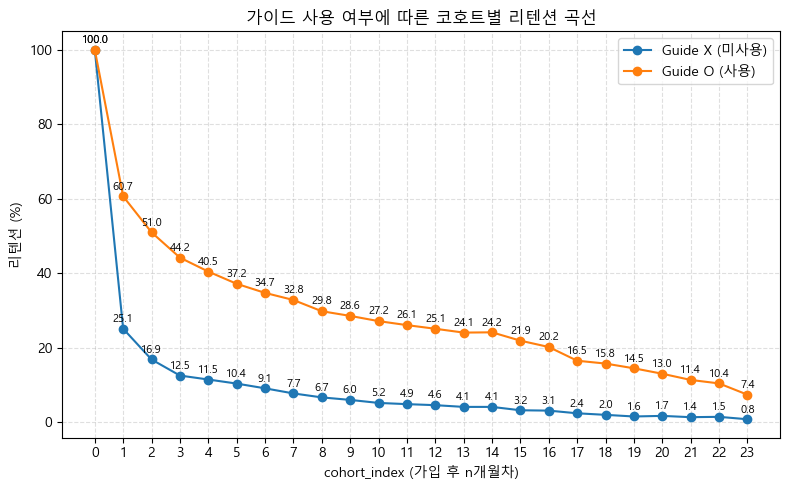

In [78]:
# 1) guide_flag 기준 피벗
ret_curve = (
    retention_by_guide
    .pivot(index="cohort_index", columns="guide_flag", values="retention_rate")
    .rename(columns={0: "no_guide", 1: "guide"})
    .sort_index()
)

ret_curve.head()

# 2) 라인 그래프
plt.figure(figsize=(8, 5))

plt.plot(ret_curve.index, ret_curve["no_guide"] * 100,
         marker='o', label="Guide X (미사용)")
plt.plot(ret_curve.index, ret_curve["guide"] * 100,
         marker='o', label="Guide O (사용)")

for idx, val in zip(ret_curve.index, ret_curve["no_guide"] * 100):
    plt.text(idx, val + 1, f"{val:.1f}", ha='center', va='bottom', fontsize=8)
for idx, val in zip(ret_curve.index, ret_curve["guide"] * 100):
    plt.text(idx, val + 1, f"{val:.1f}", ha='center', va='bottom', fontsize=8)

plt.title("가이드 사용 여부에 따른 코호트별 리텐션 곡선")
plt.xlabel("cohort_index (가입 후 n개월차)")
plt.ylabel("리텐션 (%)")
plt.xticks(ret_curve.index)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()

plt.tight_layout()
plt.show()

In [79]:
# 7일 이후 cut
logs_clean["days_from_signup"] = (logs_clean["timestamp_kst"] - logs_clean["signup_time"]).dt.days

first_week = logs_clean[logs_clean["days_from_signup"] <= 7]
fw_actions = first_week.groupby("user_uuid").size().reset_index(name="fw_total_actions")
first_week["job_view"] = (first_week["action"] == "채용정보 조회").astype(int)
fw_job_views = first_week.groupby("user_uuid")["job_view"].sum().reset_index()
first_week["profile_edit"] = (first_week["action"] == "프로필 작성/수정").astype(int)
fw_profile_edits = first_week.groupby("user_uuid")["profile_edit"].sum().reset_index()
first_week["apply_step"] = first_week["action"].str.contains("지원서 작성").astype(int)
fw_apply = first_week.groupby("user_uuid")["apply_step"].max().reset_index(name="fw_apply_step_flag")
user_new_flag = logs_clean.groupby("user_uuid")["new_user"].max().reset_index()
user_df = (
    guide_user
    .merge(fw_actions, on="user_uuid", how="left")
    .merge(fw_job_views, on="user_uuid", how="left")
    .merge(fw_profile_edits, on="user_uuid", how="left")
    .merge(fw_apply, on="user_uuid", how="left")
    .merge(user_new_flag, on="user_uuid", how="left")
    .merge(ret_pivot, on="user_uuid", how="left")
)
user_df = user_df.fillna(0)

C:\Users\user\AppData\Local\Temp\ipykernel_18204\966105774.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_week["job_view"] = (first_week["action"] == "채용정보 조회").astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_18204\966105774.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_week["profile_edit"] = (first_week["action"] == "프로필 작성/수정").astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_18204\966105774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [80]:
# 전체 30일 리텐션 (%)
overall_30 = user_df["retained_30"].mean() * 100

# 신규 유저 30일 리텐션 (%)
new_30 = user_df[user_df["new_user"] == 1]["retained_30"].mean() * 100

# 기존 유저 30일 리텐션 (%)도 보고 싶으면 옵션
existing_30 = user_df[user_df["new_user"] == 0]["retained_30"].mean() * 100

diff = new_30 - overall_30  # 신규 - 전체

print(f"전체 유저 30일 리텐션: {overall_30:.1f}%")
print(f"신규 유저 30일 리텐션: {new_30:.1f}%")
print(f"기존 유저 30일 리텐션: {existing_30:.1f}%")

# 문장으로 출력 (낮다/높다 자동 처리)
direction = "낮았습니다" if diff < 0 else "높았습니다"
print(f"👉 신규 유저의 1개월 리텐션은 {new_30:.1f}%로, "
      f"전체 평균 대비 {abs(diff):.1f}%p {direction}.")


전체 유저 30일 리텐션: 53.5%
신규 유저 30일 리텐션: 69.6%
기존 유저 30일 리텐션: 48.9%
👉 신규 유저의 1개월 리텐션은 69.6%로, 전체 평균 대비 16.1%p 높았습니다.


In [81]:
# 1) 유저별 가입 시각 / 마지막 활동 시각
user_span = (
    logs_clean
    .groupby("user_uuid")
    .agg(
        signup_time=("signup_time", "min"),
        last_time=("timestamp_kst", "max")
    )
    .reset_index()
)

# 2) 가입 후 활동 기간(시간 단위) 계산
user_span["hours_active"] = (
    user_span["last_time"] - user_span["signup_time"]
).dt.total_seconds() / 3600

# 3) 가입 후 48시간 이내에만 활동하고 끝난 유저 플래그
user_span["churn_within_48h"] = (user_span["hours_active"] <= 48).astype(int)

total_users = len(user_span)
early_churn_users = user_span["churn_within_48h"].sum()
early_churn_rate = early_churn_users / total_users * 100

print(f"전체 유저 수: {total_users:,}명")
print(f"가입 후 48시간 이내 이탈 유저 수: {early_churn_users:,}명")
print(f"👉 가입 첫 48시간 내 이탈 비율: {early_churn_rate:.1f}%")


전체 유저 수: 21,296명
가입 후 48시간 이내 이탈 유저 수: 2,908명
👉 가입 첫 48시간 내 이탈 비율: 13.7%


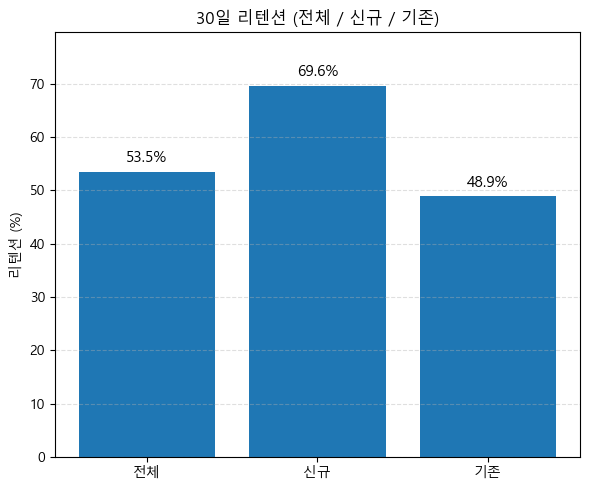

In [82]:
# 1) 30일 리텐션 비율 계산
overall_30 = user_df["retained_30"].mean() * 100
new_30 = user_df[user_df["new_user"] == 1]["retained_30"].mean() * 100
existing_30 = user_df[user_df["new_user"] == 0]["retained_30"].mean() * 100

labels = ["전체", "신규", "기존"]
values = [overall_30, new_30, existing_30]

# 2) 바 차트
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values)

# 값 라벨 표시
for bar, v in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 1,
             f"{v:.1f}%",
             ha='center', va='bottom', fontsize=11)

plt.title("30일 리텐션 (전체 / 신규 / 기존)")
plt.ylabel("리텐션 (%)")
plt.ylim(0, max(values) + 10)

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

전체 유저 수: 21,296명
48h 이내 이탈 유저 수: 2,908명 (13.7%)


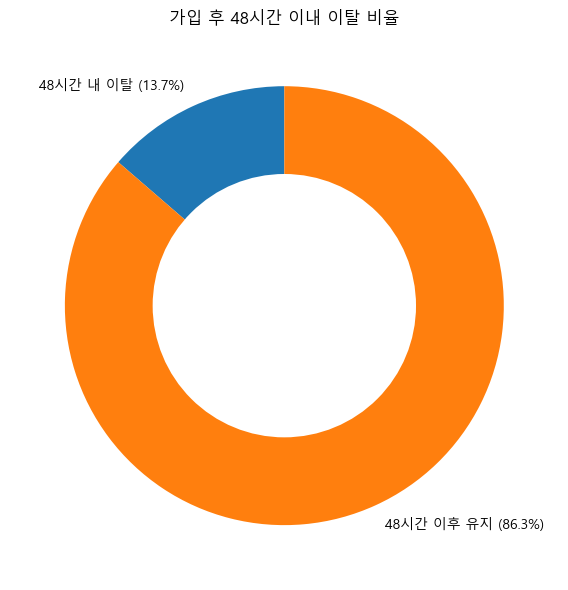

In [83]:
# 1) 유저별 가입~마지막 활동 시간 계산
user_span = (
    logs_clean
    .groupby("user_uuid")
    .agg(
        signup_time=("signup_time", "min"),
        last_time=("timestamp_kst", "max")
    )
    .reset_index()
)

user_span["hours_active"] = (
    user_span["last_time"] - user_span["signup_time"]
).dt.total_seconds() / 3600

# 2) 48시간 이내에만 활동하고 끝난 유저 플래그
user_span["churn_within_48h"] = (user_span["hours_active"] <= 48).astype(int)

total_users = len(user_span)
early_churn_users = user_span["churn_within_48h"].sum()
early_churn_rate = early_churn_users / total_users * 100

print(f"전체 유저 수: {total_users:,}명")
print(f"48h 이내 이탈 유저 수: {early_churn_users:,}명 ({early_churn_rate:.1f}%)")

# 3) 도넛 차트
sizes = [early_churn_users, total_users - early_churn_users]
labels = [f"48시간 내 이탈 ({early_churn_rate:.1f}%)",
          f"48시간 이후 유지 ({100 - early_churn_rate:.1f}%)"]

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts = ax.pie(sizes, labels=labels, startangle=90)

# 도넛 모양 만들기
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)

plt.title("가입 후 48시간 이내 이탈 비율")
plt.tight_layout()
plt.show()

In [84]:
!pip install statsmodels


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [85]:
import statsmodels.api as sm

X = user_df[[
    "guide_flag",
    "fw_total_actions",
    "job_view",          # 여기!ㄴ
    "profile_edit",      # 여기!
    "fw_apply_step_flag",
    "new_user"
]]

y = user_df["retained_30"]

X = sm.add_constant(X)
model_30 = sm.Logit(y, X).fit()
print(model_30.summary())

Optimization terminated successfully.
         Current function value: 0.615223
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            retained_30   No. Observations:                21296
Model:                          Logit   Df Residuals:                    21289
Method:                           MLE   Df Model:                            6
Date:                Wed, 03 Dec 2025   Pseudo R-squ.:                  0.1093
Time:                        20:35:38   Log-Likelihood:                -13102.
converged:                       True   LL-Null:                       -14710.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.2885      0.037    -35.215      0.000      -1.360      -1.217
guide

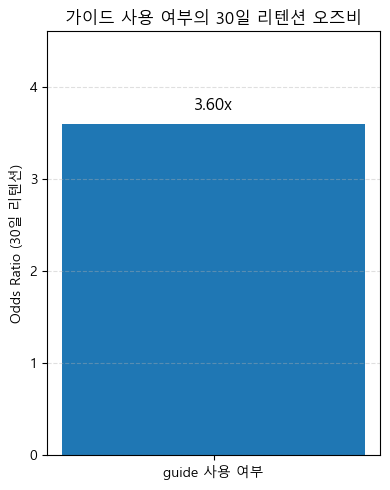

In [86]:
import numpy as np

# guide_flag의 OR 계산
or_guide = np.exp(model_30.params["guide_flag"])

plt.figure(figsize=(4, 5))
bar = plt.bar(["guide 사용 여부"], [or_guide])

plt.ylabel("Odds Ratio (30일 리텐션)")
plt.title("가이드 사용 여부의 30일 리텐션 오즈비")

plt.text(0, or_guide + 0.1, f"{or_guide:.2f}x", ha='center', va='bottom', fontsize=12)

plt.ylim(0, or_guide + 1)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


- 회귀분석(Logit) 결과, 가이드 사용 여부는 30일 리텐션 odds를 약 3.6배 증가시키는 것으로 나타났다 (p<0.001).

- 이는 가이드 기능이 단순 부가 기능이 아니라, 온보딩 · 탐색 → 재방문 유지를 만들어내는 핵심 액션임을 의미한다.

- 다른 통제 변수(초기 행동량, 공고조회수, 지원 시도 등)를 제외한 후에도 guide_flag는 가장 큰 효과 크기를 가진 변수였다.

# 5. 결론

- 이번 분석을 통해, 가이드 기능은 단순히 지원서를 돕는 보조 요소가 아니라 유저의 탐색·지원 행동 전반을 견인하고 장기 리텐션을 실질적으로 높이는 핵심 기능임이 명확히 확인되었다.

- 가이드 사용자는 비사용자 대비 공고 조회에서 +18.9%p, 기업 페이지 조회에서 +32.8%p, 지원 진입에서 +37.7%p, 최종 제출에서 +38.2%p로 나타났다.
- 각 단계마다 의미 있는 전환율 상승을 보였으며, 30·60·90일 리텐션 역시 각각 +35.5%p, +34.1%p, +31.7%p 향상되었다.

- 초기 7일 행동량·공고조회·프로필 수정·지원시도 등 다양한 요인을 통제한 로지스틱 회귀 분석에서도 가이드 사용 여부는 30일 리텐션 odds를 약 3.6배 증가시키는 가장 영향력 있는 변수로 나타났다.

- 또한 사용 시점 분석 결과, 가입 직후 4시간 내 가이드를 사용하는 유저가 전체의 절반 이상을 차지해 가이드가 강력한 온보딩 도구로 작동하고 있으며, 동시에 한 달 이후 처음 사용하는 유저도 적지 않아 재활성화(reactivation) 트리거로서의 잠재성도 확인되었다.

- 결론적으로 가이드는 플랫폼에서 유저 행동을 전방위적으로 활성화하고 장기 잔존을 촉진하는 핵심 레버리지이며, 다음과 같은 전략적 방향성이 도출된다.

## 제언

🎯 전략적 제언
1. 온보딩 플로우에서 가이드 진입 강제 또는 반강제화

- 가입 직후 첫 경험(FTUE)에 가이드를 가장 먼저 노출

- 주요 카드(개요·경력·전문분야)를 빠르게 완성시키는 마이크로 플로우 도입

- “완료율 기반 즉시 보상(프로필 점수 상승 등)” 적용

2. 전환 영향도가 높은 가이드 카드 중심의 UX 강화

- 실증적으로 전환·리텐션에 영향 큰 카드만 우선 리디자인

- 중복 입력 제거, 작성 가이드라인 자동 생성, AI 보조 입력 제공

3. 장기 미사용 유저 대상 가이드 기반 리마인드 캠페인

- 가입 후 7일·30일 동안 가이드를 한 번도 열지 않은 유저에 대한 맞춤 추천 카드 제공

- “내 프로필 완성도”, “내 전문분야 추천 공고” 등 재방문을 유도하는 메시지 연동

4. 가이드 성과의 지속 모니터링 및 실험 설계

- 가이드 진입 위치, 카드 순서 변경, 자동 추천 제안 등 A/B 테스트를 통하여 인과 관계를 강화한 실험 기반 개선 진행

- 리텐션 및 지원 전환율을 KPI로 설정하여 지표 기반 운영